In [1]:
import numpy as np
import sys
import os
import copy
sys.path.append('../..')
import importlib
import SpecWizard_AnalyseOpticaldepth
SpecWizard_AnalyseOpticaldepth = importlib.reload(SpecWizard_AnalyseOpticaldepth)
from SpecWizard_AnalyseOpticaldepth import Analyse_Opticaldepth
import SpecWizard_read_obs_data
SpecWizard_read_obs_data = importlib.reload(SpecWizard_read_obs_data)
from SpecWizard_read_obs_data import read_obs_data
import matplotlib.pyplot as plt


We load the optical depths that we previously calcualted in bleh notebook

In [7]:
path_to_od = '../IO/Multiple redshifts/'

In [8]:
spectra_files = []
redshifts  = []
for file in os.listdir(path_to_od):
    if file.endswith('.hdf5'):
        spectra_files.append(file)
        redshifts.append(float(file[34:39].replace('p','.')))
spectra_files = np.array(spectra_files)
redshifts= np.array(redshifts)
sort_mask = np.argsort(redshifts)
spectra_files = spectra_files[sort_mask]
redshifts = redshifts[sort_mask]

In [4]:
spectra_files

array(['spectra_L050N0750_snapshot_028_z000p000.hdf5',
       'spectra_L050N0750_snapshot_027_z000p101.hdf5',
       'spectra_L050N0750_snapshot_026_z000p183.hdf5',
       'spectra_L050N0750_snapshot_025_z000p271.hdf5',
       'spectra_L050N0750_snapshot_024_z000p366.hdf5',
       'spectra_L050N0750_snapshot_023_z000p503.hdf5',
       'spectra_L050N0750_snapshot_022_z000p615.hdf5',
       'spectra_L050N0750_snapshot_021_z000p736.hdf5',
       'spectra_L050N0750_snapshot_020_z000p865.hdf5',
       'spectra_L050N0750_snapshot_019_z001p004.hdf5',
       'spectra_L050N0750_snapshot_018_z001p259.hdf5',
       'spectra_L050N0750_snapshot_017_z001p487.hdf5',
       'spectra_L050N0750_snapshot_016_z001p737.hdf5',
       'spectra_L050N0750_snapshot_015_z002p012.hdf5',
       'spectra_L050N0750_snapshot_014_z002p237.hdf5',
       'spectra_L050N0750_snapshot_013_z002p478.hdf5',
       'spectra_L050N0750_snapshot_012_z003p017.hdf5',
       'spectra_L050N0750_snapshot_011_z003p528.hdf5',
       'sp

In [9]:
specdir=path_to_od 
specfile=spectra_files[17]
element='Hydrogen'
ion='H I'

In [9]:
element

'Hydrogen'

In [10]:
analysis = Analyse_Opticaldepth(specdir=specdir,specfile=specfile,element=element,ion=ion)

Using output file


In [11]:
import h5py 


In [12]:
anarq = h5py.File(specdir+specfile,'r')

Mean Flux and scaling tau

We can read all the opical depths that are in the hdf5. Using ```read_optical_depths()```

In [13]:
ods = analysis.read_optical_depths()

In [14]:
analysis.line_f0

array(0.41641)

In [15]:
analysis.mean_transmission(ODs=ods['Value'])

0.5313996092058885

In [16]:
analysis.specwizard_tau_fit

<bound method Analyse_Opticaldepth.specwizard_tau_fit of <SpecWizard_AnalyseOpticaldepth.Analyse_Opticaldepth object at 0x7fd124702320>>

In [17]:
mean_flux_fit = np.exp(-analysis.specwizard_tau_fit(analysis.header['Redshift']))
print(mean_flux_fit)

0.5515153157396699


In [18]:
scale_factor = analysis.scale_tau(ODs=ods['Value'],meanflux=mean_flux_fit,accuracy=1e-5,maxsteps=5000)

In [19]:
analysis.mean_transmission(ODs=ods['Value'],scale_factor=scale_factor)

0.5515066803872627

In [21]:
analysis.gauss_decomposition(ODs=ods)

({14: 0.35424717805187755,
  15: 0.5592580321863955,
  16: 0.618234647136564,
  'total': 0.6322409810614958},
 {14: [array([0.02535571, 0.00087317, 0.00117991, ..., 0.20467139, 0.20529462,
          0.20570062]),
   array([0.88563712, 0.77330719, 0.76026641, ..., 0.81341349, 0.8053632 ,
          0.88145817]),
   array([0.88952519, 0.88944335, 0.88919078, ..., 0.61208514, 0.61911275,
          0.62369526]),
   array([0.50705852, 0.26809967, 0.27823395, ..., 0.22621119, 0.23665282,
          0.46103703]),
   array([0.9807404 , 0.96186152, 0.96162826, ..., 0.96227272, 0.96227825,
          0.97889996]),
   array([0.78526063, 0.78495898, 0.78429995, ..., 0.61359808, 0.60791008,
          0.75494167]),
   array([0.94281023, 0.88745507, 0.88549049, ..., 0.89309521, 0.89203457,
          0.93797619]),
   array([0.89232176, 0.78619897, 0.77463208, ..., 0.82555371, 0.81683107,
          0.88845488]),
   array([0.83282782, 0.69112255, 0.68664048, ..., 0.69436225, 0.69605027,
          0.8182265

## Evolution of meanFlux

We can combine everything from above to see the evolution of redshift. 

In [302]:
mean_flux = {}
for specfile,z in zip(spectra_files,redshifts):
    mean_flux[z] = {}
    analysis = Analyse_Opticaldepth(specdir=specdir,specfile=specfile,element=element,ion=ion)
    ods = analysis.read_optical_depths()
    mean_flux[z]['mean_flux'] =  analysis.mean_transmission(ODs=ods['Value'])
    print(analysis.header['Redshift'])
    mean_flux_fit = np.exp(-analysis.specwizard_tau_fit(analysis.header['Redshift']))
    scale_tau_factor = analysis.scale_tau(ODs=ods['Value'],meanflux=mean_flux_fit,accuracy=1e-3)
    mean_flux[z]['mean_flux_scaled'] =  analysis.mean_transmission(ODs=ods['Value'],scale_factor=scale_tau_factor)

Using output file
2.220446049250313e-16
Using output file
0.10063854175996956
Using output file
0.18270987735551691
Using output file
0.2709010852615823
Using output file
0.3656685517078755
Using output file
0.5031073074342141
Using output file
0.6151897728834428
Using output file
0.7356295974153191
Using output file
0.8650505425570845
Using output file
1.0041216940401045
Using output file
1.259331495986297
Using output file
1.4867073230947274
Using output file
1.7369658229322895
Using output file
2.0124102355490097
Using output file
2.237036893082493
Using output file
2.4784133376731967
Using output file
3.0165046357126
Using output file
3.527976574640884
Using output file
3.9836635524575783
Using output file
4.4852138209154555
Using output file
5.037236486163455
Using output file
5.4874150996352435
Using output file
5.97116243381881


In [312]:
meanF         = np.array([mean_flux[z]['mean_flux'] for z in redshifts])
meanF_scaled  = np.array([mean_flux[z]['mean_flux_scaled'] for z in redshifts])
meanF_fit     = np.array([np.exp(-analysis.specwizard_tau_fit(z)) for z in redshifts])

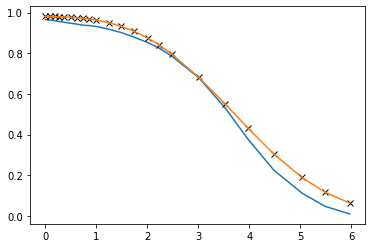

In [315]:
plt.plot(redshifts,meanF)
plt.plot(redshifts,meanF_fit,'x',c='k')
plt.plot(redshifts,meanF_scaled)

## FluxPS

In [10]:
obsdata = read_obs_data(datapath='../../data/')

In [11]:
spectra_files[16]

'spectra_L050N0750_snapshot_012_z003p017.hdf5'

In [12]:
analysis = Analyse_Opticaldepth(specdir=specdir,specfile=spectra_files[16],element=element,ion=ion)

Using output file


In [13]:
Walther18 = obsdata.Walther18()
Day19 = obsdata.Day19()

In [14]:
All_OD  = analysis.read_optical_depths();

In [15]:
meanFlux = analysis.mean_transmission(All_OD['Value'])

In [40]:
# Compute power spectrumm of the over density
kPks = []
for tau in All_OD['Value']:
    flux    = np.exp(-tau)
    k, kPk  = analysis.flux_ps(flux,meanFlux)
    kPks.append(kPk)
    
kPkmean = np.mean(kPks,axis=0)
meanf   = meanFlux
LogVar   = np.log10(kPkmean)

EagleFPS = {'meanf': meanf, 'logk': np.log10(k), 'LogVar':LogVar, 'kPkmean':kPkmean, 'kPk':kPks}
print("Calculation finished")

Calculation finished


/cosma/home/dp004/dc-aram1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/cosma/home/dp004/dc-aram1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


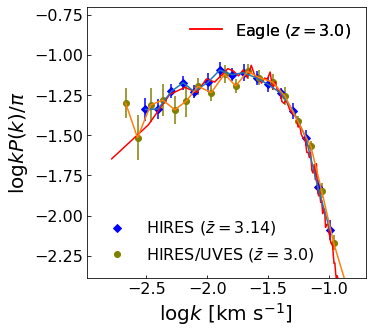

In [41]:



# observed versus simulated power spectrum at z=3.

fig, ax  = plt.subplots(1, 1, figsize = (5, 5))
#
labels  = []
labels2 = []
fontsize = 20
# Day 19
color = 'blue'
label = r'HIRES ($\bar z=3.14$)'
h, = ax.plot(Day19['logk'], Day19['logVar'], 'D', color=color, label=label)
labels.append(copy.copy(h))
ax.errorbar(Day19['logk'], Day19['logVar'], yerr=0.5*(Day19['Max']-Day19['Min']), ecolor=color, label=label)

# Walther 18
color = 'olive'
label = r'HIRES/UVES ($\bar z=3.0$)'
h, = ax.plot(Walther18['logk'], Walther18['logVar'], 'o', color=color, label=label)
labels.append(copy.copy(h))
ax.errorbar(Walther18['logk'], Walther18['logVar'], yerr=0.5*(Walther18['Max']-Walther18['Min']), ecolor=color, label=label)

# Eagle
color = 'red'
label = r'Eagle $(z=3.0)$'
h, = ax.plot(EagleFPS['logk'], EagleFPS['LogVar'], color=color, label=label)
labels2.append(copy.copy(h))

ax.set_ylim(-2.39, -0.7)
ax.set_xlim(-2.99, np.log10(0.2))
ax.set_xlabel(r'$\log k~[{\rm km~s}^{-1}]$', fontsize=fontsize)
ax.set_ylabel(r'$\log kP(k)/\pi$', fontsize=fontsize)

ax.tick_params(direction = 'in')
ax.tick_params(axis='both', which='major', labelsize=0.9*fontsize)
ax.tick_params(axis='both', which='major', labelsize=0.8*fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0.5*fontsize)

#
legend = ax.legend(handles=labels, loc='lower left', frameon=False, fontsize=0.8*fontsize)
ax.add_artist(legend)

#
legend = ax.legend(handles=labels2, loc='upper right', frameon=False, fontsize=0.8*fontsize)
ax.add_artist(legend)
fig.savefig('FPS.jpg',format='jpg', dpi=200, bbox_inches='tight')
fig.show()


In [20]:
# Compute power spectra
def FluxPS(vel, flux, meanf=1.0):
    ''' Function that calculates the flux power spectrum
        Input:
               Vel: pixel velocities in km/s
               Flux (exp(-tau))
               meanf: average flux of all your spectra NOT of the individual spectra, or theoretical Flux eg from oñorbe fit
        output: Kvals in [s/km], the product kP(k)/pi.
        Note that the variance is kP(k)/pi
    '''
    N        = len(flux)
    V        = np.max(vel) - np.min(vel)

    dv       = V / N
    freqs    = np.fft.fftfreq(N)
    freqs   *= (2 * np.pi / dv)
    indx     = np.argsort(freqs)
    indx     = indx[freqs[indx] >= 0]
    freqs    = freqs[indx]

    delta    = (flux - meanf) / meanf
    fourier  = np.fft.fft(delta)[indx]
    fourier  /= N
    pwr_spec = np.abs(fourier)**2
    pwr_spec *= V


    kPk      = pwr_spec * freqs / np.pi

    return freqs, kPk


In [33]:
analysis.flux_ps(flux,meanFlux)

(array([0.00000000e+00, 1.64150770e-03, 3.28301540e-03, ...,
        3.13692121e+00, 3.13856272e+00, 3.14020423e+00]),
 array([0.00000000e+00, 6.67205089e-04, 5.84438046e-03, ...,
        3.77651934e-10, 1.13742217e-10, 4.89397073e-10]))

In [22]:
analysis.flux_ps(flux,meanFlux)

mean flux =  0.6784443848212929 number of spectra =  250
Calculation finished


/cosma/home/dp004/dc-aram1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/cosma/home/dp004/dc-aram1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


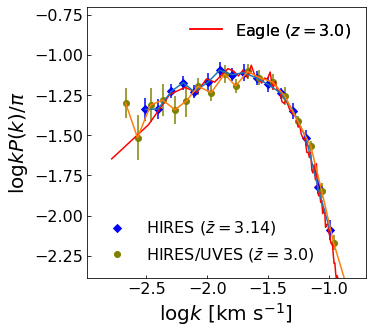

In [21]:

# Compute power spectrumm of the over density
vel_kms = analysis.vHubble
kPks    = {}
nc      = 0
meanf   = 0.0
for i,tau in enumerate(All_OD['Value']):
    flux    = np.exp(-tau)
    k, kPk  = FluxPS(vel_kms, flux)
    kPks[i] = kPk
    if i == 0:
        kPkmean = kPk
        meanf   = np.mean(flux)
    else:
        kPkmean += kPk
        meanf   += np.mean(flux)
    nc += 1
kPkmean /= nc
meanf   /= nc
print("mean flux = ", meanf, 'number of spectra = ', nc)
LogVar   = np.log10(kPkmean) - 2 * np.log10(meanf)

EagleFPS = {'meanf': meanf, 'logk': np.log10(k), 'LogVar':LogVar, 'kPkmean':kPkmean, 'kPk':kPks}
print("Calculation finished")


# observed versus simulated power spectrum at z=3.

fig, ax  = plt.subplots(1, 1, figsize = (5, 5))
#
labels  = []
labels2 = []

# Day 19
color = 'blue'
label = r'HIRES ($\bar z=3.14$)'
h, = ax.plot(Day19['logk'], Day19['logVar'], 'D', color=color, label=label)
labels.append(copy.copy(h))
ax.errorbar(Day19['logk'], Day19['logVar'], yerr=0.5*(Day19['Max']-Day19['Min']), ecolor=color, label=label)

# Walther 18
color = 'olive'
label = r'HIRES/UVES ($\bar z=3.0$)'
h, = ax.plot(Walther18['logk'], Walther18['logVar'], 'o', color=color, label=label)
labels.append(copy.copy(h))
ax.errorbar(Walther18['logk'], Walther18['logVar'], yerr=0.5*(Walther18['Max']-Walther18['Min']), ecolor=color, label=label)

# Eagle
color = 'red'
label = r'Eagle $(z=3.0)$'
h, = ax.plot(EagleFPS['logk'], EagleFPS['LogVar'], color=color, label=label)
labels2.append(copy.copy(h))

ax.set_ylim(-2.39, -0.7)
ax.set_xlim(-2.99, np.log10(0.2))
ax.set_xlabel(r'$\log k~[{\rm km~s}^{-1}]$', fontsize=fontsize)
ax.set_ylabel(r'$\log kP(k)/\pi$', fontsize=fontsize)

ax.tick_params(direction = 'in')
ax.tick_params(axis='both', which='major', labelsize=0.9*fontsize)
ax.tick_params(axis='both', which='major', labelsize=0.8*fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0.5*fontsize)

#
legend = ax.legend(handles=labels, loc='lower left', frameon=False, fontsize=0.8*fontsize)
ax.add_artist(legend)

#
legend = ax.legend(handles=labels2, loc='upper right', frameon=False, fontsize=0.8*fontsize)
ax.add_artist(legend)
#fig.savefig('FPS.png',format='png', dpi=200, bbox_inches='tight')
fig.show()

In [116]:
nc

250

In [38]:
1/meanf

1.4739601688403798